## KMeans Image Segmentation

This code reads an image and treats pixel as three element feature vector of unsupervised data. It performs KMeans clustering of the pixels and then re-colours the image using the median of each colour component within the clusters.

In [1]:
# The usual loading of modules
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
from sklearn import cluster
from scipy import misc
from numpy import zeros

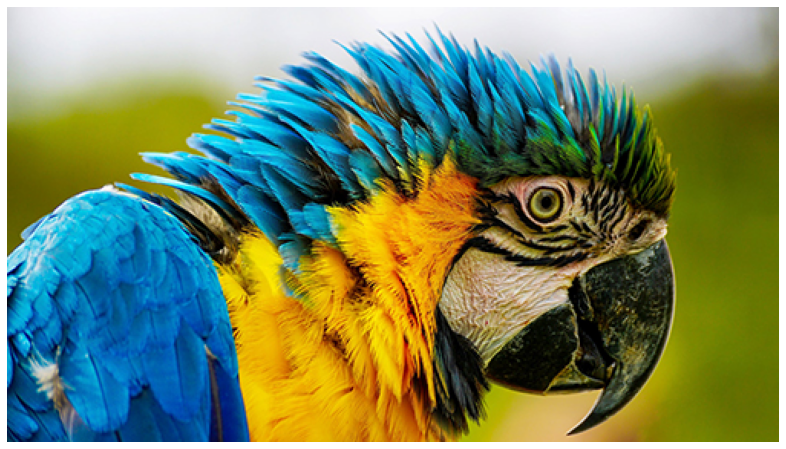

In [2]:
# Load an image.
imagex = image.imread("parrot_small.jpeg") # You may want to test with a smaller image, it will be faster
plt.figure(figsize = (15,8))
plt.axis("off") # An axis free plot
plt.imshow(imagex) # Display the image
x, y, z = imagex.shape # Get the dimensions of the image (z is the number of colour bytes)
image_2d = imagex.reshape(x*y, z) # Turn the 2D pixels into 1D pixels
image_2dr = zeros([x*y,z]) # and create an output array for the re-coloured image. 

In [3]:
# THIS IS THE PART YOU ARE TO REPLACE
cluster_count = 10 # How many clusters we want
kmeans_cluster = cluster.KMeans(n_clusters=cluster_count) # Create a clusterer
kmeans_cluster.fit(image_2d) # Apply it to the data
cluster_labels = kmeans_cluster.labels_ # Cluster membership for each pixel

In [4]:
# Turn the clustered data into a DataFrame and add the class as a fourth column
cluster_2d = pd.DataFrame(image_2d, columns=list('abc'))
cluster_2d['d'] = cluster_labels

# loop over each of the clusters and calculate a colour to represent it.
for a in range(0,cluster_count):   
    subset = cluster_2d.loc[cluster_2d['d'] == a] # Extract all the pixels that belong to the cluster
    m = subset.median().values # and calcuate the median of each colour channel
    print(m) # Show each of the colours we're going to use
    
    # Each pixel in the cluster is then painted with the cluster colour
    for i in range(0, len(cluster_labels)):
        if (cluster_labels[i] == a):
            image_2dr[i] = m[0:3]

[191. 198. 190.   0.]
[101. 107.   2.   1.]
[  2. 108. 174.   2.]
[20. 22.  9.  3.]
[234. 177.   4.   4.]
[233. 233. 239.   5.]
[160. 136.   4.   6.]
[  6. 171. 214.   7.]
[  5.  70. 109.   8.]
[170. 162. 102.   9.]


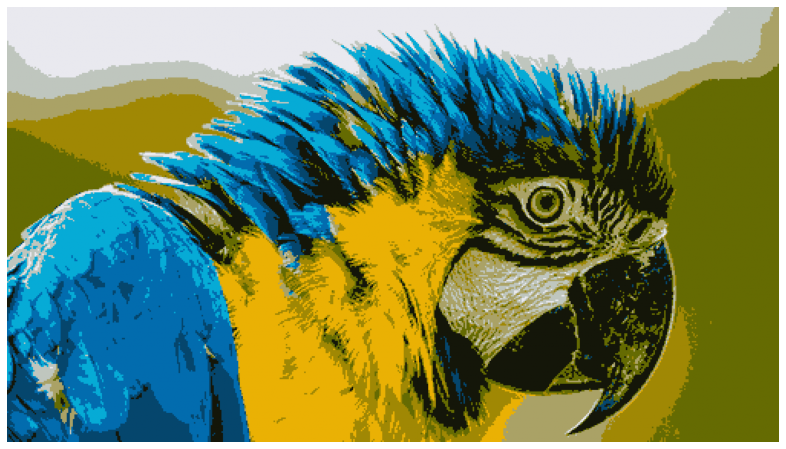

In [5]:
# Display the results
image_out = image_2dr.reshape(x, y, z)/255.0 #Scale to 0-1 range
plt.figure(figsize = (15,8))
plt.axis("off")
plt.imshow(image_out)

# Use the following to save the image
plt.savefig('clustered_out.png', bbox_inches='tight')